<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/Distribution_de_l'%C3%A9chantillonage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving coffee_ratings_full.feather to coffee_ratings_full.feather


# **Erreur relative des estimations ponctuelles**

## **La taille de l'échantillon est le nombre de lignes**

In [ ]:
coffee_ratings = pd.read_feather('/content/coffee_ratings_full.feather')

### **échantillon aléatoire simple**

In [ ]:
len(coffee_ratings.sample(n=300))

300

### **l'échantillon aléatoire simple(25% de la population)**

In [ ]:
len(coffee_ratings.sample(frac=0.25))


334

## **Différentes tailles de l'échantillon**

In [ ]:
coffee_ratings['total_cup_points'].mean()


82.15120328849028

In [ ]:
coffee_ratings.sample(n=10)['total_cup_points'].mean()

81.85900000000001

In [ ]:
coffee_ratings.sample(n=100)['total_cup_points'].mean()

81.87960000000001

In [ ]:
coffee_ratings.sample(n=1000)['total_cup_points'].mean()


82.16349000000001

# **Erreurs relatives**

## Paramètre de la population :


In [ ]:
population_mean = coffee_ratings['total_cup_points'].mean()

## Estimation ponctuelle :


In [ ]:
sample_size = 1000

In [ ]:
sample_mean = coffee_ratings.sample(n=sample_size)['total_cup_points'].mean()

## Erreur relative en pourcentage :


In [ ]:
rel_error_pct = 100 * abs(population_mean-sample_mean) / population_mean
rel_error_pct


0.0046174472660500425

## **Erreur relative par rapport à la taille de l'échantillon**

In [ ]:
import matplotlib.pyplot as plt
#errors.plot(x="sample_size",y="relative_error",kind="line")
#plt.show()

# **Créer une distribution de l'échantillon**


### **Même code, réponse différente**

In [ ]:
coffee_ratings.sample(n=30)['total_cup_points'].mean()

81.79933333333334

In [ ]:
coffee_ratings.sample(n=30)['total_cup_points'].mean()

82.79633333333335

In [ ]:
coffee_ratings.sample(n=30)['total_cup_points'].mean()

82.484

In [ ]:
coffee_ratings.sample(n=30)['total_cup_points'].mean()

81.79566666666668

### **Même code, 1000 fois**

In [ ]:
mean_cup_points_1000 = []
for i in range(1000):
    mean_cup_points_1000.append(
        coffee_ratings.sample(n=30)['total_cup_points'].mean())
print(mean_cup_points_1000)

[82.57066666666668, 82.542, 81.11999999999999, 82.28299999999999, 81.36200000000002, 82.12266666666666, 82.69166666666666, 82.58833333333332, 81.52600000000001, 81.223, 82.27, 82.00533333333333, 82.19800000000002, 81.992, 81.92766666666667, 82.11566666666667, 82.125, 81.98366666666668, 81.536, 81.70833333333333, 82.16066666666666, 82.35633333333334, 82.32866666666668, 82.28066666666668, 82.986, 82.88833333333332, 82.45333333333335, 82.54766666666666, 82.387, 82.20700000000002, 81.72233333333334, 81.35366666666667, 82.30633333333334, 81.91366666666666, 81.63366666666666, 82.24233333333333, 83.114, 82.90833333333333, 82.43900000000001, 81.959, 81.31733333333334, 81.56533333333333, 81.911, 82.19133333333333, 81.89166666666665, 82.39733333333334, 82.44200000000001, 81.95866666666667, 81.38666666666668, 82.07266666666666, 81.93066666666667, 81.12733333333334, 82.26366666666667, 82.327, 82.74933333333333, 82.662, 81.87366666666667, 83.09433333333332, 82.51466666666667, 82.06400000000001, 82.

## **Répartition des moyennes de l'échantillon pour la taille 30**

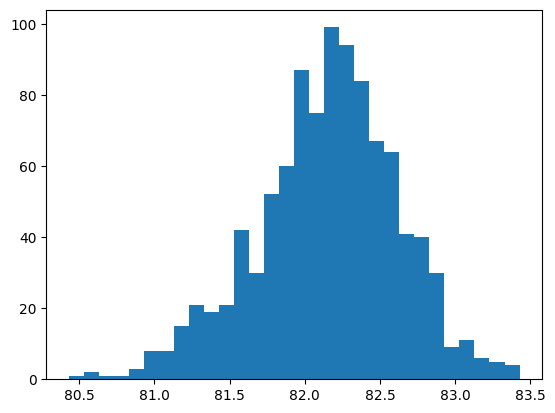

In [ ]:
import matplotlib.pyplot as plt
plt.hist(mean_cup_points_1000, bins=30)
plt.show()

La distribution de l'échantillonnage est une distribution de
répétitions des estimations ponctuelles.


#**Erreurs types et le théorème de la limite centrale**


# **Conséquences du théorème central limite**

Les moyennes des échantillons indépendants ont environ **distributions normales.**

À mesure que la taille de l’échantillon augmente,

- La distribution des moyennes devient plus proche d’être normalement distribué.

- La largeur de la distribution d'échantillonnage devient plus étroit.

## **Moyenne de la répartition de la population et de l'échantillonnage**

In [ ]:
coffee_ratings['total_cup_points'].mean()

82.15120328849028

## **Écarts types de la population et de la distribution d’échantillonnage**

In [ ]:
coffee_ratings['total_cup_points'].std(ddof=0)


2.685858187306438

Spécifier ddof=0 en appelant .std()sur la population

Spécifier ddof=1 en appelant np.std()sur l'échantillon ou les distributions de l'échantillonnage

## **Erreur standard**

 Écart type de la distribution d'échantillonnage

 Un outil important pour comprendre la variabilité de l’échantillonnage